In [1]:
# import libraries
import pandas as pd
import numpy as np

from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
market_df = pd.read_excel('../../data/market_data.xlsx')

## Data preprocessing

In [3]:
# Check dtypes : No problem 
market_df.dtypes

Time (UTC+10)                                             datetime64[ns]
Regions NSW Trading Price ($/MWh)                                float64
Regions SA Trading Price ($/MWh)                                 float64
Regions TAS Trading Price ($/MWh)                                float64
Regions VIC Trading Price ($/MWh)                                float64
Regions NSW Trading Total Intermittent Generation (MW)           float64
Regions SA Trading Total Intermittent Generation (MW)            float64
Regions TAS Trading Total Intermittent Generation (MW)           float64
Regions VIC Trading Total Intermittent Generation (MW)           float64
Regions NSW Operational Demand (MW)                                int64
Regions SA Operational Demand (MW)                                 int64
Regions TAS Operational Demand (MW)                                int64
Regions VIC Operational Demand (MW)                                int64
dtype: object

In [4]:
# Check missing values : No Missing Values
market_df.isnull().values.any()

False

In [5]:
# Explore descriptive stats
market_df.describe()

,Regions NSW Trading Price ($/MWh),Regions SA Trading Price ($/MWh),Regions TAS Trading Price ($/MWh),Regions VIC Trading Price ($/MWh),Regions NSW Trading Total Intermittent Generation (MW),Regions SA Trading Total Intermittent Generation (MW),Regions TAS Trading Total Intermittent Generation (MW),Regions VIC Trading Total Intermittent Generation (MW),Regions NSW Operational Demand (MW),Regions SA Operational Demand (MW),Regions TAS Operational Demand (MW),Regions VIC Operational Demand (MW)
count,63457.000000,63457.000000,63457.000000,63457.000000,63457.000000,63457.000000,63457.000000,63457.000000,63457.000000,63457.000000,63457.000000,63457.000000
mean,76.490073,77.168657,64.705163,78.746880,65.665476,112.431257,103.323441,169.029236,7977.524371,1399.975905,1172.162898,5083.026018
std,206.959029,302.062059,82.680094,289.259796,55.152681,80.120747,48.436695,114.763946,1251.105505,339.076961,140.736186,862.678623
min,-139.930000,-919.780000,-844.650000,-676.370000,-1.390000,-1.790000,0.000000,-0.860000,5310.000000,300.000000,711.000000,2529.000000
25%,42.060000,39.090000,32.840000,39.010000,19.050000,44.000000,63.710000,70.080000,7068.000000,1208.000000,1068.000000,4438.000000
50%,61.130000,64.830000,55.640000,64.110000,50.870000,97.460000,98.950000,152.060000,7843.000000,1373.000000,1149.000000,4972.000000
75%,83.630000,95.020000,87.780000,94.850000,105.150000,169.900000,141.650000,257.320000,8686.000000,1571.000000,1252.000000,5585.000000
max,14700.000000,14700.000000,4551.390000,14700.000000,228.700000,334.970000,235.480000,467.480000,13835.000000,3240.000000,1724.000000,9667.000000


##### Comment:
- Can Trading Price be negative?
- Can Power Generated be negative?
- Should we check if the formula was calculated correctly?

In [6]:
# Look at Victoria only
victoria_df = market_df[['Time (UTC+10)', 
                     'Regions VIC Trading Price ($/MWh)',
                     'Regions VIC Trading Total Intermittent Generation (MW)',
                     'Regions VIC Operational Demand (MW)' ]]
victoria_df.head()

,Time (UTC+10),Regions VIC Trading Price ($/MWh),Regions VIC Trading Total Intermittent Generation (MW),Regions VIC Operational Demand (MW)
0,2018-01-01 00:00:00,90.43,146.87,4599
1,2018-01-01 00:30:00,92.46,131.68,4398
2,2018-01-01 01:00:00,87.62,119.98,4238
3,2018-01-01 01:30:00,73.08,123.86,4112
4,2018-01-01 02:00:00,70.18,132.72,3956


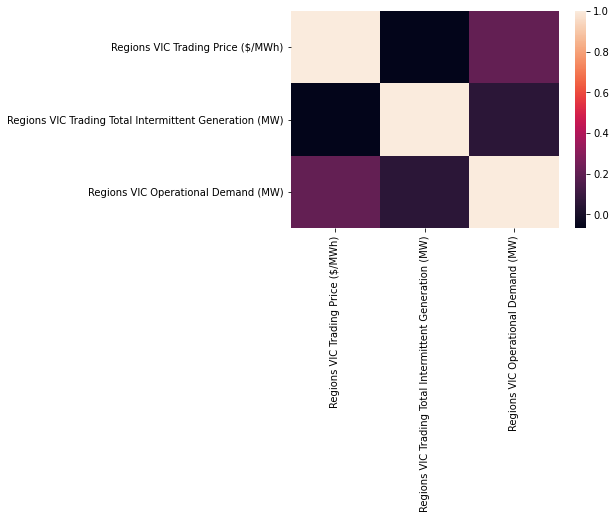

In [7]:
# Correlation : Not highly correlated between variables 
sns.heatmap(victoria_df.corr());

## Time Series Analysis

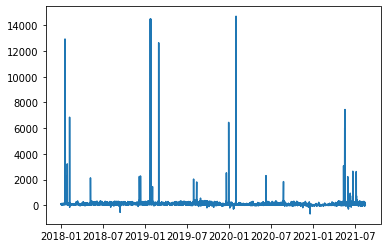

In [8]:
# Trading Price across time : There are some extreme values that needed further investigation. Negative price?
plt.plot(victoria_df['Time (UTC+10)'],victoria_df['Regions VIC Trading Price ($/MWh)']);
# Peaks are noticed during summer

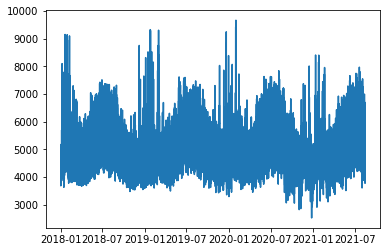

In [9]:
# Operational Demand across time : Seems to be relatively consistent with few peaks correlated with the extreme trading price
plt.plot(victoria_df['Time (UTC+10)'],victoria_df['Regions VIC Operational Demand (MW)']);
# Peaks during summer, smaller peaks during winter

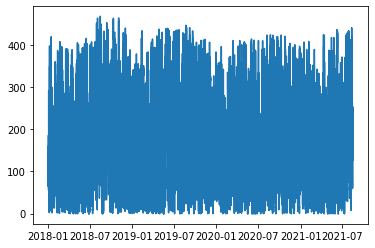

In [10]:
# Total Intermittent Generation across time : the range is too big to observe any trend 
plt.plot(victoria_df['Time (UTC+10)'],victoria_df['Regions VIC Trading Total Intermittent Generation (MW)']);
# demand for electricity from solar panel is higher due to power outage of other sources such as coal, gas etc

## Linear Regression 

In [11]:
# Can we predict the Price based on Demand(Operational Demand) and Supply(Intermittent Generation)?
from sklearn.linear_model import LinearRegression

X = victoria_df[['Regions VIC Operational Demand (MW)', 'Regions VIC Trading Total Intermittent Generation (MW)']]
y =  victoria_df['Regions VIC Trading Price ($/MWh)']
reg = LinearRegression().fit(X, y)

In [12]:
# R-squared of the model 
print("R-squared : " + str(reg.score(X, y)))
print("Coefficient of the model : " + str(reg.coef_))
print("Intercept : " + str(reg.intercept_))

R-squared : 0.048586339872216944
Coefficient of the model : [ 0.07030342 -0.20187076]
Intercept : -244.48517455079417


Comment :
- Demand and Supply has relatively low predictive power. Forms the baseline? 
- Model seems to suggest something intuitive : Price increases as demand increases, Price increases as supply decreases.

## More questions
- How to find the revenue per year?
- How to know when to discharge or charge? New columns?

In [15]:
import sys
sys.path.append("../../team_code/hester/optimize_helpfuncs") # path of helper functions

In [16]:
from optimize_helpfuncs import get_dispatch

In [19]:
POWER = 300
CAPACITY = 580
CHARGE_EFF = 90
DISCHARGE_EFF = 90
MLF = 0.991
FIXED_OP = 8.1
VAR_OP = 0

In [20]:
get_dispatch(300)

NameError: name 'DISCHARGE_EFF' is not defined